<a href="https://colab.research.google.com/github/vishal0820/Netflix-DAV-CaseStudy/blob/main/Netflix_DAV_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Netflix Business Case Study</center>



## Libraries
Below are the libraries required for analysing and visualizing data

In [ ]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## Data loading and initial analysis

Loading the Netflix data into Pandas dataframe for easily handling of data

In [ ]:
# read the netflix.csv file into a pandas dataframe
df = pd.read_csv('netflix.csv')
# look at the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


A quick look at the information of the data reviles that there are **8807 rows and 12 columns** implying 8807 Movies/TV shows  with each having 12 features like *type, title, release year, director* to name a few. The datatype of all the columns is “object” except for the column *release_year* which is of *int64* datatype. So most of the data values are in string format. We can also infer that there are missing values or nulls in the columns *director, cast, country, date_added, rating, duration* which needs to be handled properly. \
\
A smaple of the data is shown below:

In [ ]:
# look at the top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Irrelevant column and datatype conversion

It can be observed that the column **'show_id' and 'description' seems irrelevant** and the column **'date_added' needs to be converted to datetime datatype** for easy handling. New columns, 'week_added', 'month_added' and 'year_added', are created by extracting 'week', 'month' and 'year' from the 'date_added' column

In [ ]:
# drop the show_id column
if 'show_id' in df.columns:
    df.drop(columns='show_id', inplace=True)
# drop the description column
if 'description' in df.columns:
    df.drop(columns='description', inplace=True)
# convert column 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Add 'week_added' and 'month_added' columns
df['week_added'] = df['date_added'].dt.isocalendar().week
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].fillna(0).astype(int)

## Handling null values

The **null values** in the categorical columns are **replaced** with **'unknown_column_name'**. For e.g. null values in 'director' column are replced by 'unknown_director'

In [ ]:
df['director'] = df['director'].fillna('unknown_director')
df['cast'] = df['cast'].fillna('unknown_cast')
df['country'] = df['country'].fillna('unknown_country')
df['rating'] = df['rating'].fillna('unknown_rating')
df['duration'] = df['duration'].fillna('unknown_duration')

In [ ]:
# there should not be any nulls now except or NaT in date, week and month colums
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8709 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   listed_in     8807 non-null   object        
 10  week_added    8709 non-null   UInt32        
 11  month_added   8709 non-null   object        
 12  year_added    8807 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), int64(2), object(9)
memory usage: 868.8+ KB


## Unnesting of columns
Few columns like 'cast', 'director', 'country' and 'listed_in' have multiple cells with multiple comma seperated values. All of these values need to be in seperate rows for better analysis of data. All these values are 'strings'. They first need to be converted to list of strings and then unnested. Once they are unnested, the values need to be cleaned by removing spaces at the beginning and end of the words. Some empty cells are also created while converting to list of strings, these are removed from the data

In [ ]:
unnested_df = df.copy(deep=True)
unnested_df['cast'] = unnested_df['cast'].str.split(',')
unnested_df['director'] = unnested_df['director'].str.split(',')
unnested_df['country'] = unnested_df['country'].str.split(',')
unnested_df['listed_in'] = unnested_df['listed_in'].str.split(',')
unnested_df = unnested_df.explode('cast', True)
unnested_df = unnested_df.explode('director', True)
unnested_df = unnested_df.explode('country', True)
unnested_df = unnested_df.explode('listed_in', True)
unnested_df['cast'] = unnested_df['cast'].str.strip()
unnested_df['director'] = unnested_df['director'].str.strip()
unnested_df['country'] = unnested_df['country'].str.strip()
unnested_df['country'] = unnested_df[unnested_df['country'] != '']['country']
unnested_df['listed_in'] = unnested_df['listed_in'].str.strip()
unnested_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,week_added,month_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,38,September,2021
1,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,38,September,2021
2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,38,September,2021
3,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,38,September,2021
4,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,38,September,2021


# Analysis
## Counts of each categorical variable using both graphical and nongraphical methods

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


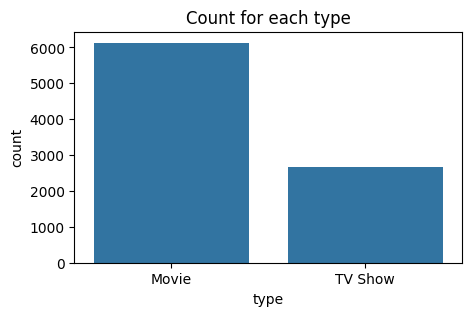

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='type')
plt.title('Count for each type')
plt.show()

Netflix has almost double Movies than TV Shows in its database, **6131 Movies and 2676 TV Shows** to be precise

In [ ]:
df['release_year'].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1


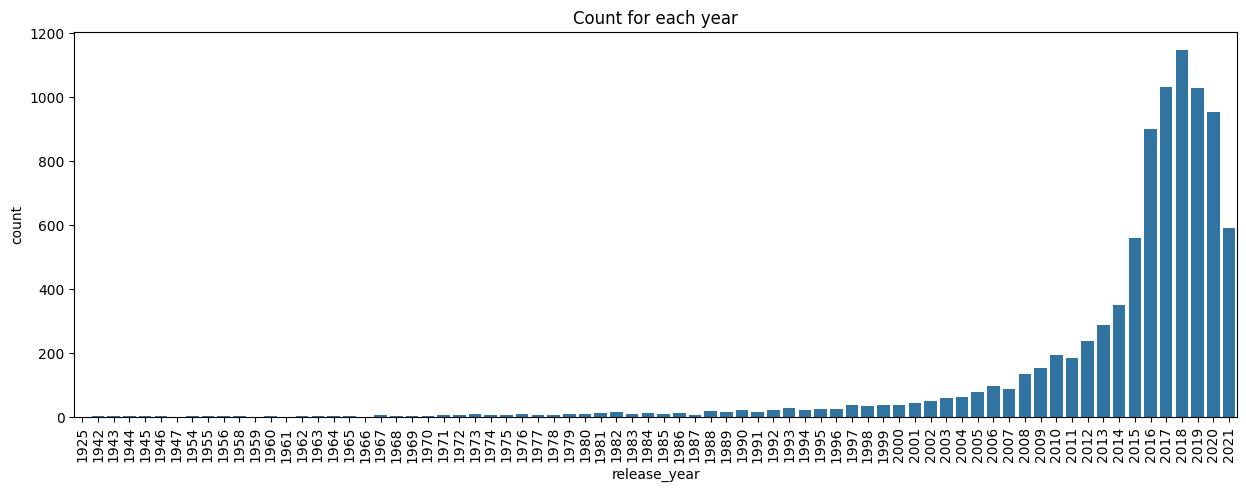

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='release_year')
plt.title('Count for each year')
plt.xticks(rotation=90)
plt.show()

**2018** is the year during which **maximum content(Movies and TV shows) was released**

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


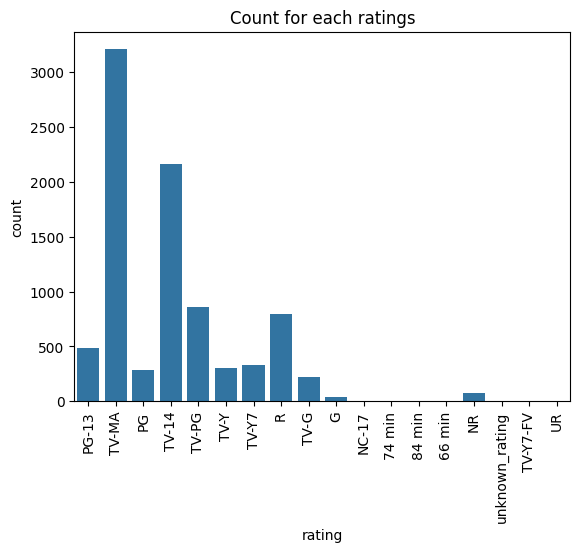

In [ ]:
sns.countplot(data=df, x='rating')
plt.title('Count for each ratings')
plt.xticks(rotation=90)
plt.show()

Most of the content on Netflix has a rating of **TV-MA** followed by **TV-14**

## Comparison of tv shows vs. movies.
### a. Number of movies produced in each country

In [ ]:
movies_df = unnested_df[unnested_df['type'] == 'Movie']
countries_movies = movies_df.groupby('country')
countries_movies = countries_movies['title'].nunique().sort_values(ascending=False)
countries_movies[countries_movies.index != 'unknown_country'][:10]

,title
country,
United States,2752
India,962
United Kingdom,534
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


Above are the top 10 countries which produce most number of movies. **United States produces the most number of movies followed with a large gap by India**

### b. Number of Tv-Shows produced in each country

In [ ]:
tvShows_df = unnested_df[unnested_df['type'] == 'TV Show']
countries_tvShows = tvShows_df.groupby('country')
countries_tvShows = countries_tvShows['title'].nunique().sort_values(ascending=False)
countries_tvShows[countries_tvShows.index != 'unknown_country'][:10]

,title
country,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


Again **United States is at the top in producing the most number of TV Shows followed by United Kingdom**

## Best time to launch a TV show or a Movie?
### a. Best week to add a Tv-show or a movie.

In [ ]:
tvShows_df = df[df['type'] == 'TV Show']
tvShows_df.groupby('week_added')['title'].nunique().sort_values(ascending=False)[:5]

,title
week_added,
27,85
31,79
24,75
35,73
13,73


In [ ]:
movies_df = df[df['type'] == 'Movie']
movies_df.groupby('week_added')['title'].nunique().sort_values(ascending=False)[:5]

,title
week_added,
1,316
44,243
40,215
9,207
26,195


Based on the majority, **the best week to launch a TV Show is 1st or 2nd week of July and for a Movie is 1st week of Jan**

### b. Best month to add the Tv-show or the movie.

In [ ]:
tvShows_df.groupby('month_added')['title'].nunique().sort_values(ascending=False)[:5]

,title
month_added,
July,254
December,250
September,246
June,232
August,230


In [ ]:
movies_df.groupby('month_added')['title'].nunique().sort_values(ascending=False)[:5]

,title
month_added,
July,565
April,550
December,547
January,546
October,545


**The best month to launch a TV Show or a Movie is July**

## Analysis of actors/directors of different types of shows/movies.
### a. Top 10 actors who have appeared in most movies or TV shows.

In [ ]:
actors = unnested_df.groupby('cast')['title'].nunique().sort_values(ascending=False)
actors = actors[actors.index != 'unknown_cast'][:10]
print("The top 10 actors who have appeared in most movies or TV shows are", \
      ", ".join(actors.index.tolist()))

The top 10 actors who have appeared in most movies or TV shows are Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah, Takahiro Sakurai, Rupa Bhimani, Akshay Kumar, Om Puri, Yuki Kaji, Amitabh Bachchan


### b. Identify the top 10 directors who have appeared in most movies or TV shows.

In [ ]:
directors = unnested_df.groupby('director')['title'].nunique().sort_values(ascending=False)
directors = directors[directors.index != 'unknown_director'][:10]
print("The top 10 directors who have directed the most movies or TV shows are", \
      ", ".join(directors.index.tolist()))

The top 10 directors who have directed the most movies or TV shows are Rajiv Chilaka, Jan Suter, Raúl Campos, Suhas Kadav, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Martin Scorsese, Youssef Chahine, Jay Chapman


## Movie generes that are more popular or produced more

In [ ]:
# considering only movies
genres = unnested_df[unnested_df['type'] == 'Movie']['listed_in']
# removing frequently occuring words to avoid bias
if 0:
    genres = unnested_df['listed_in'].str.replace(" TV Shows", "")
    genres = genres.str.replace(" TV ", "")
    genres = genres.str.replace("TV ", "")
    genres = genres.str.replace(" TV", "")
    genres = genres.str.replace("TV", "")
    genres = genres.str.replace(" Shows ", "")
    genres = genres.str.replace("Shows ", "")
    genres = genres.str.replace(" Shows", "")
    genres = genres.str.replace("Shows", "")
genres = genres.str.replace(" Movies ", "")
genres = genres.str.replace("Movies ", "")
genres = genres.str.replace(" Movies", "")
genres = genres.str.replace("Movies", "")
genres = genres.str.replace("-", "")
genres = genres.str.replace(" ","_")
genres = genres.str.replace("&", "and")
genres = ','.join(genres.tolist())

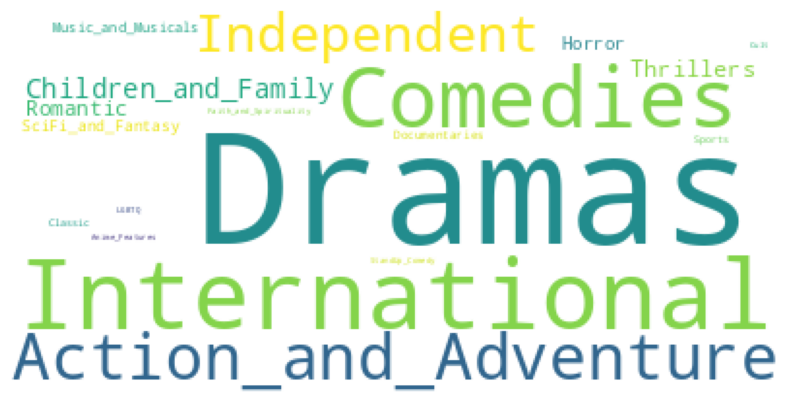

In [ ]:
# producing word cloud for genre
plt.figure(figsize = (10,6))

stopwords = set(STOPWORDS)
text = genres
wordcloud = WordCloud(max_font_size=80,
                      max_words=50,
                      background_color="white",
                      stopwords = stopwords,
                      random_state = 10,
                      collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud.words_

{'Dramas': 1.0,
 'International': 0.9475608937797759,
 'Comedies': 0.6988190297255586,
 'Action_and_Adventure': 0.40985036569818156,
 'Independent': 0.32993357042206267,
 'Children_and_Family': 0.3278199020331477,
 'Thrillers': 0.23844192444474266,
 'Romantic': 0.21512447158290277,
 'Horror': 0.1533583842179427,
 'SciFi_and_Fantasy': 0.13544252834999665,
 'Music_and_Musicals': 0.1032342481379588,
 'Documentaries': 0.08082265315708247,
 'Sports': 0.05136549687982286,
 'Classic': 0.04841307119371938,
 'Cult': 0.03613366436287996,
 'Anime_Features': 0.03506005502247869,
 'LGBTQ': 0.028115144601758034,
 'Faith_and_Spirituality': 0.024122659867140843,
 'StandUp_Comedy': 0.01811715761927129}

In [ ]:
most_popular_generes = [k for k, v in wordcloud.words_.items() if v > 0.4]
print('The top most popular movie genres are', ", ".join(most_popular_generes))

The top most popular movie genres are Dramas, International, Comedies, Action_and_Adventure


## After how many days the movie will be added to Netflix after the release of the movie, considering the recent past data

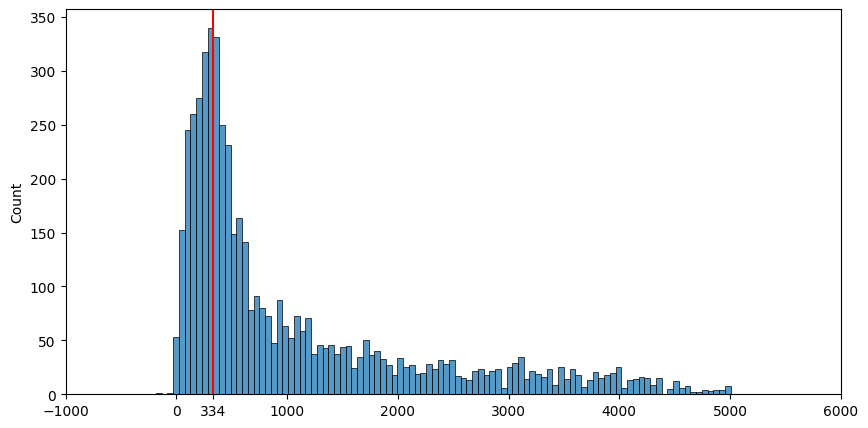

The best time to add a movie to Netflix would be 334 days after its release


In [ ]:
# considering only movies that were released after 2007
recent_data = df[(df['release_year'] > 2007) & (df['type'] == 'Movie')]
release_year = pd.to_datetime(recent_data['release_year'], format="%Y", errors='coerce')
# finding the difference in days between the release year and the date it was added to Netflix
date_diff = (recent_data['date_added'] - release_year).dt.days
# finding the mode
mode = date_diff.mode()[0]
# ploting the data
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=date_diff, bins=100)
plt.axvline(x=mode, color='red')
xticks = [*ax.get_xticks(), mode]
xticklabels = [*ax.get_xticklabels(), int(mode)]
ax.set_xticks(xticks, labels=xticklabels)
plt.show()
print(f"The best time to add a movie to Netflix would be {mode} days after its release")

Netflix was founded in 2007, so considering only those movies that were released after 2007, we find that the majority of the movies were added to Netflix within 1000 days of its release and the **the best time to add a movie to Netflix would be 334 days after its release**

## Country wise analysis

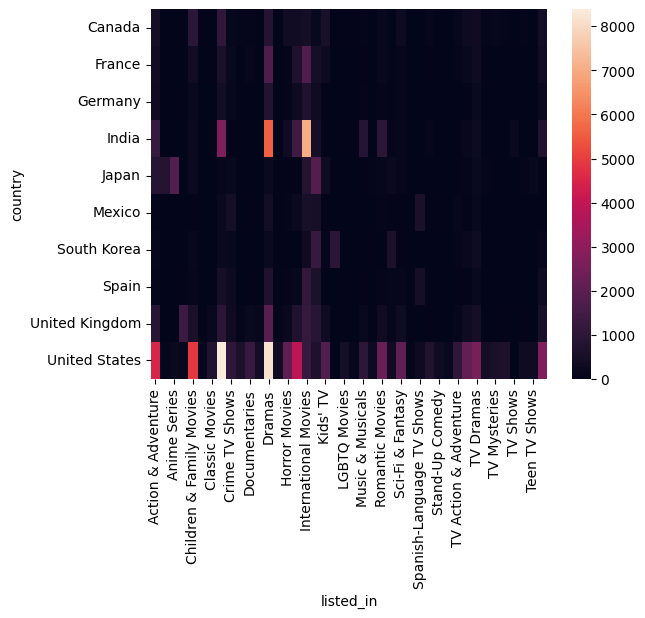

In [ ]:
top_10_countries = unnested_df.groupby('country')['title'].nunique().sort_values(ascending=False)
top_10_countries = top_10_countries[top_10_countries.index != 'unknown_country'][:10]
reduced_df = unnested_df[unnested_df['country'].isin(list(top_10_countries.index))]
x = reduced_df.pivot_table(index='country',columns='listed_in',aggfunc='size',fill_value=0)
sns.heatmap(x)
plt.show()

A significant number of content belonging to each genre is produced in United States

<ipython-input-30-30ffa46b59d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['duration'] = reduced_df['duration'].str.strip(' min').astype(int)


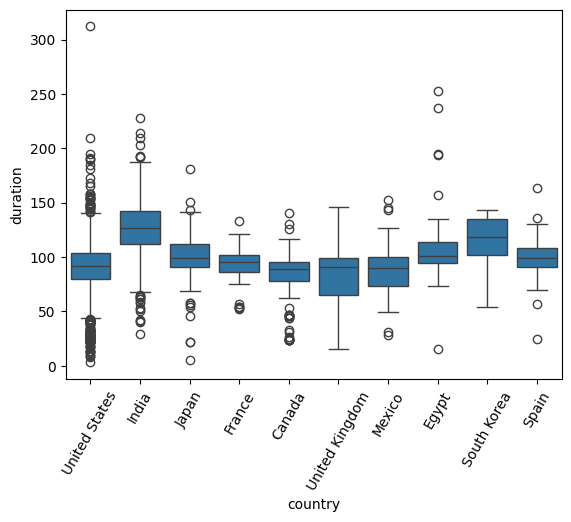

In [ ]:
top_10_countries = df.groupby('country')['title'].nunique().sort_values(ascending=False)
top_10_countries = top_10_countries[top_10_countries.index != 'unknown_country'][:10]
reduced_df = df[(df['country'].isin(list(top_10_countries.index)))
                & (df['type'] == 'Movie')
                & (df['duration'] != 'unknown_duration')]
reduced_df['duration'] = reduced_df['duration'].str.strip(' min').astype(int)
sns.boxplot(data=reduced_df, x='country', y='duration')
plt.xticks(rotation=60)
plt.show()

Movies produced in **India** tend to be of **longer duration**. United States seems to have movies ranging from very low duration to very high duration.

## Recent years analysis

Ignoring the year 2021 as the data is incomplete(data is available only till Sep 2021) and considering last 30 years

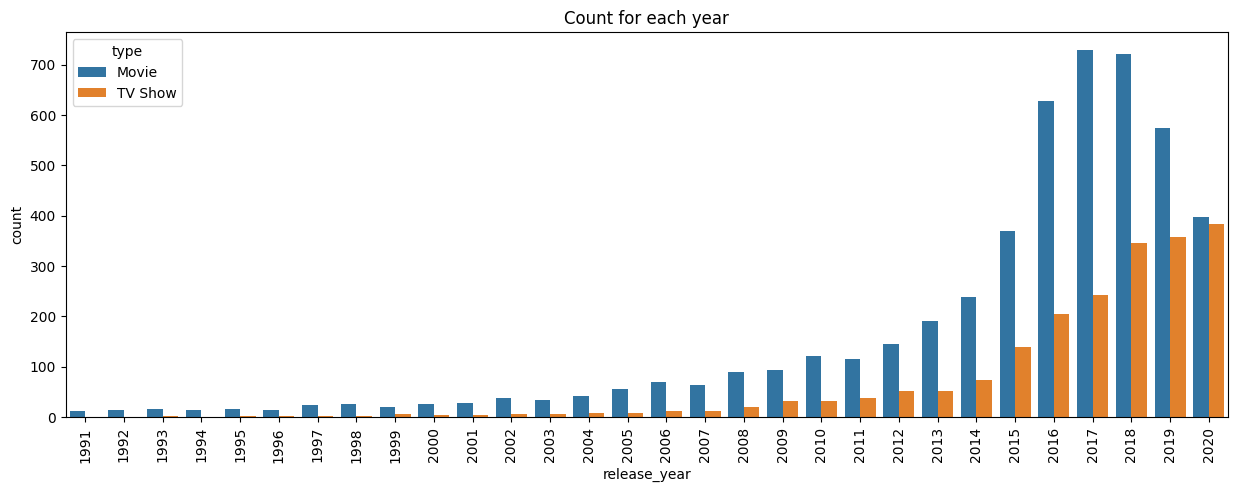

In [ ]:
recent_content = df[(df['release_year'] > 1990) & (df['release_year'] < 2021)
                    & (df['year_added'] > 1990) & (df['year_added'] < 2021)]
plt.figure(figsize=(15,5))
sns.countplot(data=recent_content, x='release_year', hue='type')
plt.title('Count for each year')
plt.xticks(rotation=90)
plt.show()

It can be observed that the number of **movies released** every year was **increasing till year 2017 and then it started dropping** whereas the number of **TV Shows released** per year is always on the **up trend.**

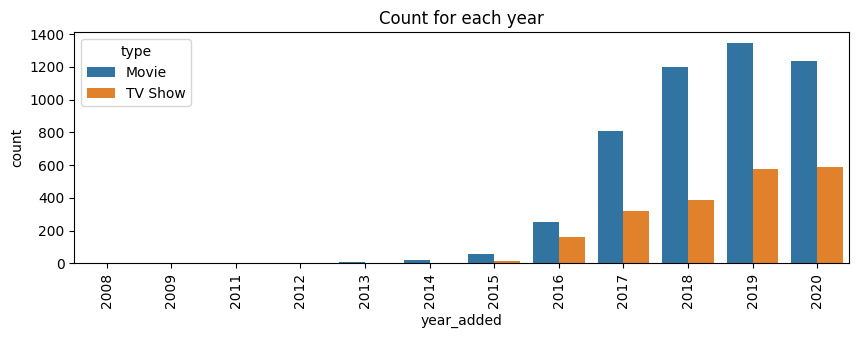

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=recent_content, x='year_added', hue='type')
plt.title('Count for each year')
plt.xticks(rotation=90)
plt.show()

The above plot is inline with the previous observation. The number of movies added per year increases till 2019 and then decreases in 2020 but the number of TV shows added keep increasing.

# Recommendation to Netflix

Netflix should focus on **adding contents** whose directors are one among the **top 10 directors**(Rajiv Chilaka, Jan Suter, RaÃºl Campos, Suhas Kadav, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Martin Scorsese, Youssef Chahine and Jay Chapman) and adding contents whose cast are one among the **top 10 actors**(Anupam Kher, Shah Rukh Khan, Julie Tejwani, Takahiro Sakurai, Naseeruddin Shah, Rupa Bhimani, Om Puri, Akshay Kumar, Yuki Kaji and Paresh Rawal). By focusing on **top countries**(United States, India, United Kingdom, Canada, France, Japan etc), where more number of **content is produced**, Netflix can **attract more subscribers** from those countries. As the number of TV shows releasd per year is increasing, Netflix should **add more TV shows** to keep the subscribers engaged. The **best time** to add a TV Show is 1st/2nd week of **July** and for a Movie is 1st week of **Jan** or in the month of July also keeping in mind that it should be **334 days after the release** of the content. Top genres like Dramas, International, Comedies and Action_and_Adventure will bring in more views from the subscribers.